## **Prediction of trends in Gender Pay Gap for OECD Countries** ##

### **Part-1: Exploring the Global Gender Pay Gap across countries for a period of 20 years**

### **(1) Importing Python Libraries & Setting the Environment**

In [20]:
import pandas as pd
import csv
from functools import reduce
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### **(2) About Data**

* **Average Annual Wages-**To enable the comparison of levels and trends of average annual wages, OECD provides benchmark average wage estimates derived from the OECD National Accounts covering all economy sectors and all types of dependent employment. These averages shall provide a consistent time series and cross country comparisons. The average pay is obtained by dividing the total wage bill (“wages and salaries”, in the terminology of National Accounts) by the average number of employees in the total economy, also multiplying by the ratio of average usual weekly hours worked for full-time dependent employee in their main job to average usual weekly hours worked for all dependent employee in their main job.The resulting estimates correspond to average annual wages per full-time equivalent dependent employee.

* **Employee Compensation-** Earnings and Wages are "the total remuneration, in cash or in kind, payable to all persons counted on the payroll (including homeworkers), in return for work done during the accounting period". Employee Compensation is made up of these two components. Wages include social contributions, taxes etc. paid on behalf of employees while salaries are the actual social contributions payable by employers for their employees.Compensation of employees excludes any taxes payable by the employer on the wage and salary bill (e.g. payroll tax, fringe benefits tax).This indicator is broken down by agriculture (including forestry and fishing), industry and services. It is measured as percentage of gross value added.

* **Gender Pay Gap-** Gender pay Gap is calculated as a difference of the median earnings of men and women relative to the median earnings of men. Note that these are median earnings in full-time jobs and so are not affected by a widespread preference for part-time work by women (though men tend to work longer hours than women).

* **Wage Levels-** Wage levels are divided by low pay and high pay. The incidence of low pay refers to the share of workers earning less than two-thirds of median earnings . The incidence of high pay refers to the share of workers earning more than one-and-a-half time median earnings. This indicator is measures as a percentage.

### **(3) Importing Dataset**

In [24]:
#Getting the current working directory
os.getcwd()

direct='/resources/Projects/EDA/'
avg_pay='/resources/Projects/EDA/data/Average_Wages.csv'
emp_comp='/resources/Projects/EDA/data/Empcomp_industry.csv'
gender_pay='/resources/Projects/EDA/data/Gender_Pay_Gap.csv'
wage_lev='/resources/Projects/EDA/data/Wage_levels.csv'

#Reading the data 
#Read Annual Average Pay Dataset
avgpay=pd.read_csv(avg_pay)

#Read Employee Compensation Dataset
empcomp=pd.read_csv(emp_comp)

#Read Gender Pay Gap Dataset
gpg=pd.read_csv(gender_pay)
   
#Read Wage Levels Dataset
wglev=pd.read_csv(wage_lev)

avgpay.head()

### **(4) Cleaning Dataset**

In [28]:
#Drop columns with NaN
del avgpay['Flag Codes']
del empcomp['Flag Codes']
del gpg['Flag Codes']
del wglev['Flag Codes']

#Change col name and type
avgpay.rename(columns={'TIME':'Year','Value':'Avg_wage'}, inplace=True)
empcomp.rename(columns={'TIME':'Year','Value':'Compensation'}, inplace=True)
gpg.rename(columns={'TIME':'Year','Value':'Wage_Gap'}, inplace=True)
wglev.rename(columns={'TIME':'Year','Value':'Wage_level'}, inplace=True)

#Drop unwanted columns
avgpay.drop(["INDICATOR","SUBJECT","MEASURE","FREQUENCY"],axis=1,inplace=True)
empcomp.drop(["INDICATOR","MEASURE","FREQUENCY"],axis=1,inplace=True)
gpg.drop(["INDICATOR","SUBJECT","MEASURE","FREQUENCY"],axis=1,inplace=True)
wglev.drop(["INDICATOR","MEASURE","FREQUENCY"],axis=1,inplace=True)

#Ensure all dataset have the same time period
avgpay = avgpay[(avgpay['Year'] >= 1997) & (avgpay['Year'] <= 2017)]
empcomp = empcomp[(empcomp['Year'] >= 1997) & (empcomp['Year'] <= 2017)]
gpg = gpg[(gpg['Year'] >= 1997) & (gpg['Year'] <= 2017)]
wglev = wglev[(wglev['Year'] >= 1997) & (wglev['Year'] <= 2017)]

#Change Data type
avgpay['Avg_wage'] = avgpay['Avg_wage'].apply(lambda x: int(x) if x == x else "")
empcomp['Compensation'] = empcomp['Compensation'].apply(lambda x: int(x) if x == x else "")
gpg['Wage_Gap'] = gpg['Wage_Gap'].apply(lambda x: int(x) if x == x else "")
wglev['Wage_level'] = wglev['Wage_level'].apply(lambda x: int(x) if x == x else "")

In [29]:
#Join the data frames
#frames=[avgpay,empcomp,gpg,wglev]
#df1 = reduce(lambda  left,right: pd.merge(left,right, on=['LOCATION', 'Year'], how='outer'), frames)
#df1.head()

### **(4) Data Visualization**

Exploring each indicator to visualize their trends across a period of 28 years for the OECD Countries. 

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


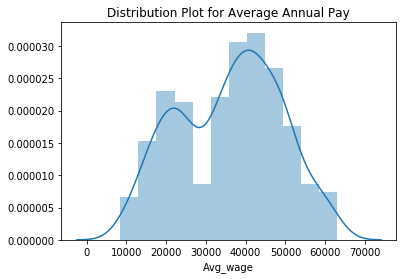

In [30]:
#Visualizing the average annual pays across countries 
avgpay.describe()
di=sns.distplot(avgpay.Avg_wage.dropna())
plt.title("Distribution Plot for Average Annual Pay")
#plt.show()
dist= di.get_figure()
dist.savefig('AvgPay.png')

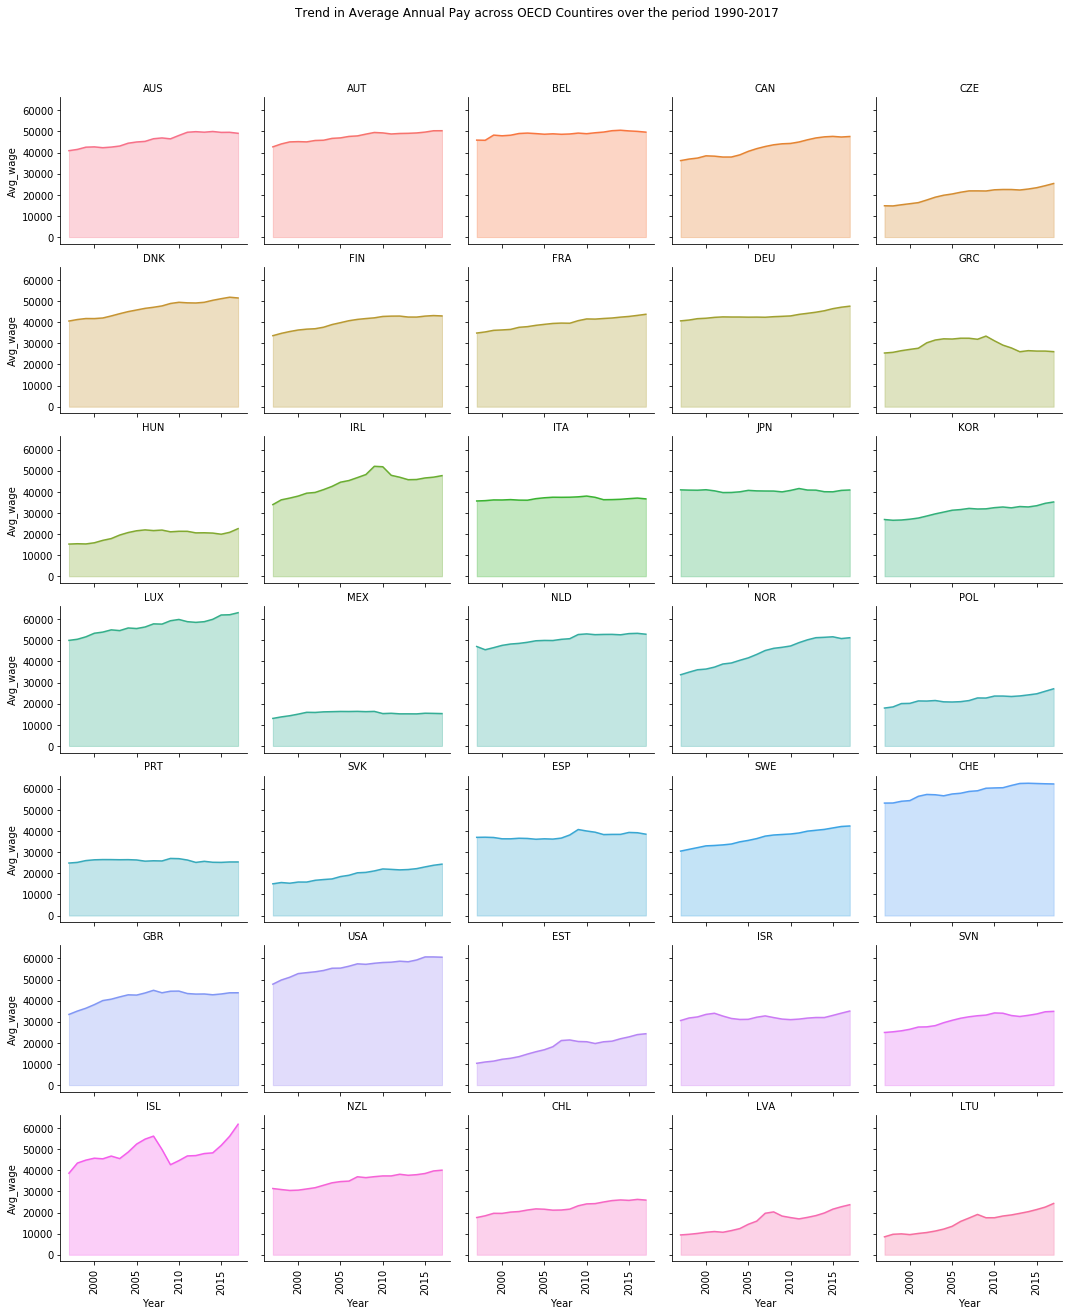

In [31]:
#Visualizing the trend in the average annual pays across countries 
g = sns.FacetGrid(avgpay, col='LOCATION', hue='LOCATION', col_wrap=5, )
g = g.map(plt.plot, 'Year', 'Avg_wage')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g = g.map(plt.fill_between, 'Year', 'Avg_wage', alpha=0.3).set_titles("{col_name} LOCATION")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92, bottom=0.15)
g = g.fig.suptitle('Trend in Average Annual Pay across OECD Countires over the period 1990-2017')
#plt.show()
fig= g.get_figure()
fig.savefig('avgpay_trend.png')

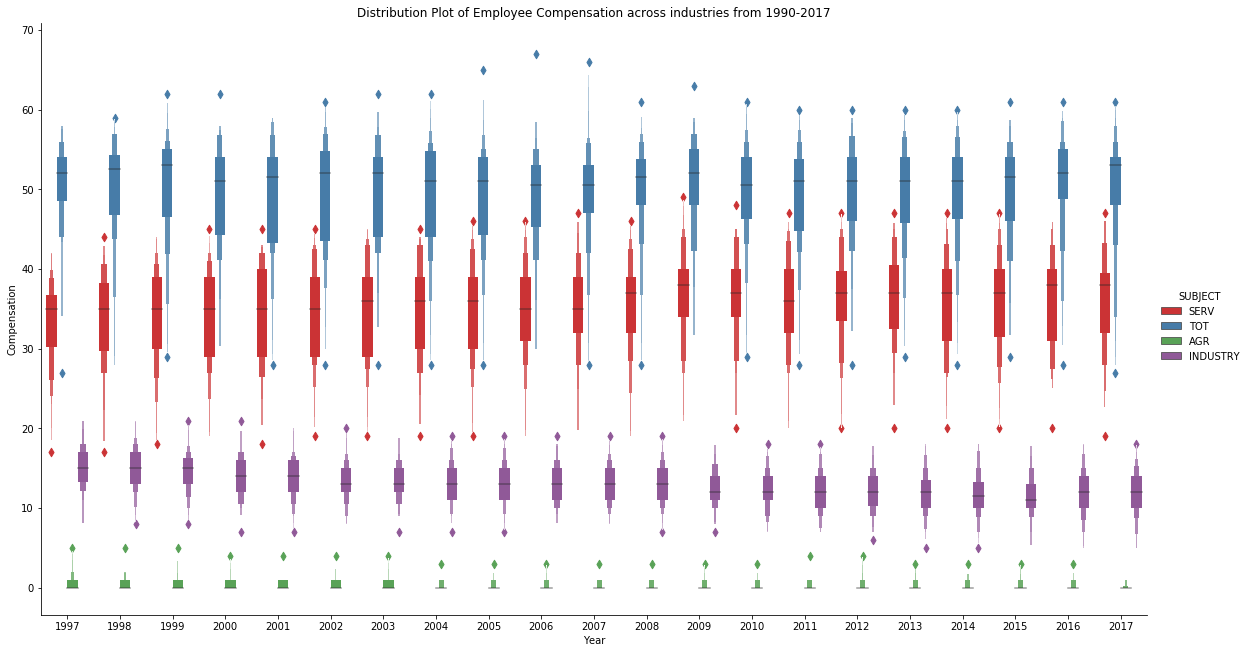

In [32]:
#Visualizing the Employee Compensation across countries 
empcomp.describe()
di=sns.catplot(x="Year", y="Compensation", hue="SUBJECT", data=empcomp, kind="boxen", palette="Set1", height=9, aspect=1.8)
plt.title("Distribution Plot of Employee Compensation across industries from 1990-2017")
#plt.show()
#dist= di.get_figure()
di.savefig('EmpComp.png')

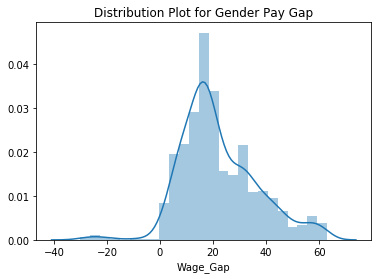

In [33]:
#Distribution of the gender pay gap 
gpg.describe()
di=sns.distplot(gpg.Wage_Gap.dropna())
plt.title("Distribution Plot for Gender Pay Gap")
#plt.show()
dist= di.get_figure()
dist.savefig('GenderPayGap.png')

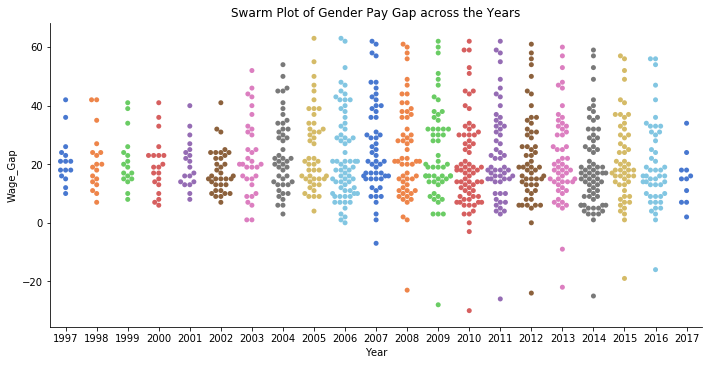

In [34]:
#Visualizing the underlying distribution of Gender Pay Gap Yearly
ax = sns.catplot(x="Year", y="Wage_Gap", data=gpg, palette="muted", kind="swarm", height=5, aspect=2)
plt.title("Swarm Plot of Gender Pay Gap across the Years")
#plt.show()
dist= di.get_figure()
dist.savefig('gpg_swarmplot.png')

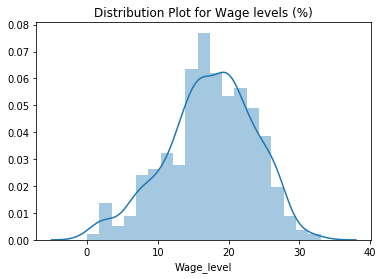

In [35]:
#Visualizing the wage levels across OECD countries 
wglev.describe()
di=sns.distplot(wglev.Wage_level.dropna())
plt.title("Distribution Plot for Wage levels (%)")
#plt.show()
dist= di.get_figure()
dist.savefig('Wagelevel.png')

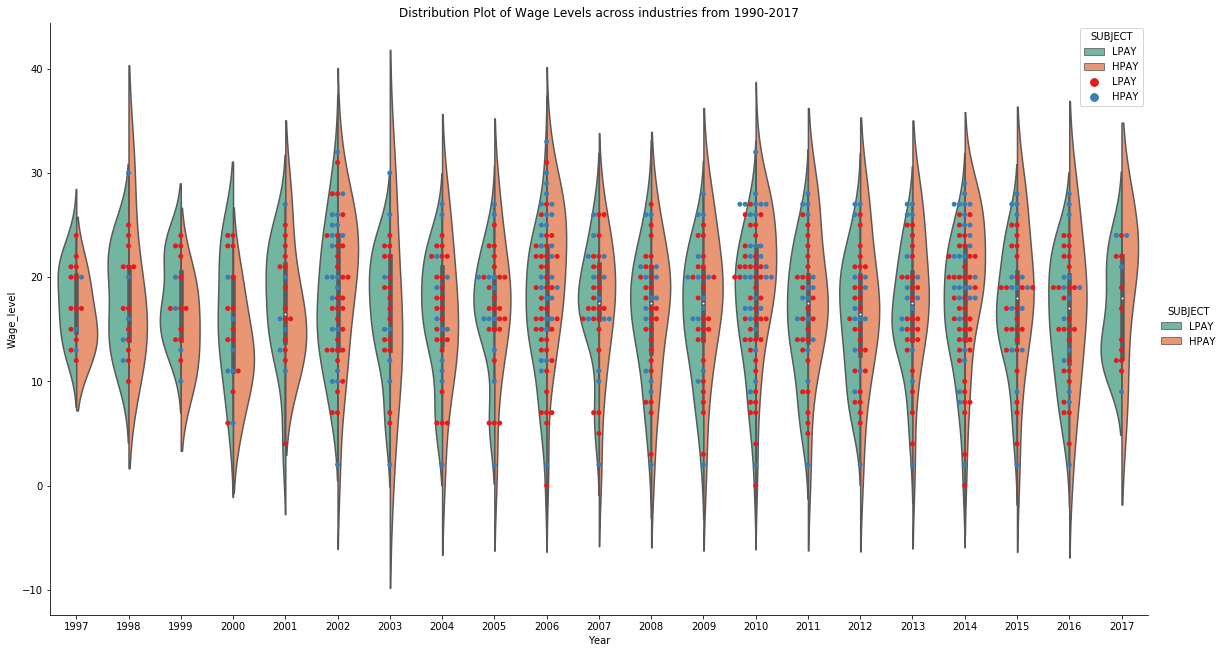

In [51]:
#Visualizing the Employee Compensation across countries 
di=sns.catplot(x="Year", y="Wage_level", hue="SUBJECT", data=wglev, kind="violin", split=True, palette="Set2", height=9, aspect=1.8)
sns.swarmplot(x="Year", y="Wage_level", hue="SUBJECT", data=wglev, palette="Set1")  
plt.title("Distribution Plot of Wage Levels across industries from 1990-2017")
#plt.show()
#dist= di.get_figure()
di.savefig('wglevel_count.png')